In [1]:
# nltk.download()


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import gc


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('a.csv')
# print('Number of rows and columns in the train data set:',train.shape)
# print('Number of rows and columns in the test data set:',test.shape)


In [2]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


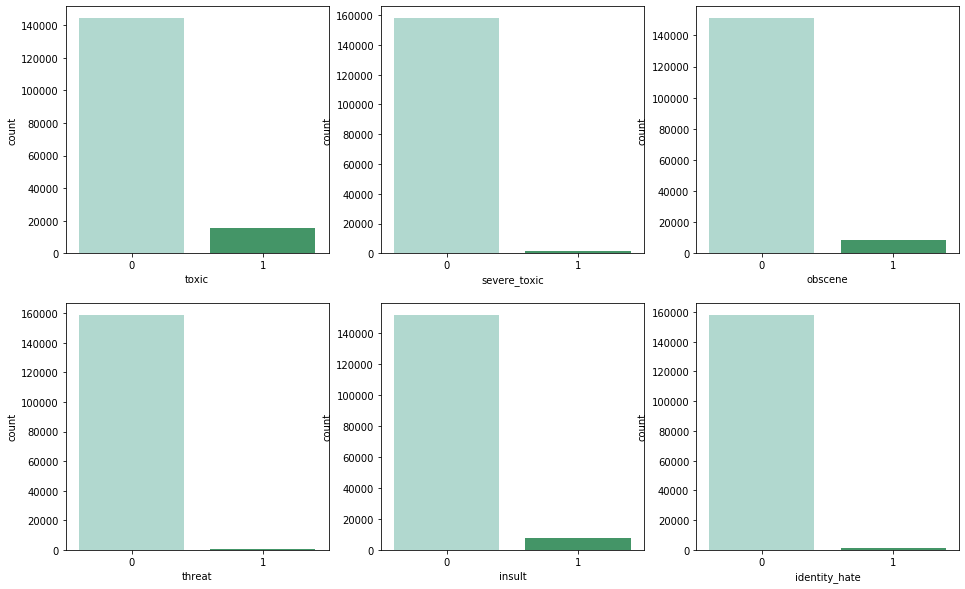

In [5]:

%matplotlib inline
seed = 2390

fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'BuGn',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'BuGn',ax=ax2)
sns.countplot(train['obscene'], palette= 'BuGn',ax=ax3)
sns.countplot(train['threat'], palette= 'BuGn',ax = ax4)
sns.countplot(train['insult'], palette = 'BuGn',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'BuGn', ax = ax6)



In [6]:
import re
target_labels =['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [7]:
import nltk
# nltk.download()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [7]:
lemmatized_trainComment = []
for i in range(0,len(train)):
    lemmatized_comment = lemmatize_text(train['comment_text'][i])
    lemmatized_trainComment.append(lemmatized_comment)
train['comment_text'] = pd.Series(lemmatized_trainComment).astype(str)

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"\'ve","have",text)
    text = re.sub(r"\'s"," ",text)
    text = re.sub(r"can't", "cannot",text)
    text = re.sub(r"\'d" ,"would",text)
    text = re.sub(r"n't" ,"not",text)
    text = re.sub(r"\'ll" ,"will",text)
    text = re.sub("\W", " ",text)
    text = re.sub(r"\s+" ," ",text) 
    text = text.strip()
    return text

In [9]:
cleaned_trainComment = []
for i in range(0,len(train)):
    cleaned_comment = clean_text(train['comment_text'][i])
    cleaned_trainComment.append(cleaned_comment)
train['comment_text'] = pd.Series(cleaned_trainComment).astype(str)

In [10]:
from nltk.corpus import stopwords
customStopWords = stopwords('english')

# for x in range(ord('b'),ord('z')+1):
#     customStopWords.append(chr(x))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = vect_word = TfidfVectorizer( lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1),dtype=np.float32)
x_dtm = vect.fit_transform(train["comment_text"]) 
test_dtm = vect.transform(test["comment_text"])

In [12]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(C=3.5,solver = 'sag')
for label in target_labels:
    y = train[label]
    logreg.fit(x_dtm,y)
    y_pred_x = logreg.predict(x_dtm)
    test_y_prob = logreg.predict_proba(test_dtm)[:,1]
    sub[label]= test_y_prob
sub.to_csv("submissionNew",index = False)

In [13]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=29,solver='saga',random_state=0,tol=0.0025,fit_intercept=False)
for label in target_labels:
    y = train[label]
    ridgereg.fit(x_dtm,y)
    y_pred_x = ridgereg.predict(x_dtm)
    test_y_prob = ridgereg.predict(test_dtm)[:]
    sub[label]= test_y_prob
sub.to_csv("submissionNewRidge",index = False)

In [14]:
# k = pd.DataFrame()
# k['train'] = train.isnull().sum()
# k['tes'] = test.isnull().sum()
# k

In [15]:
# test.fillna(' ',inplace=True)
# gc.collect()

In [16]:
# # vect_word.replace('[^a-zA-Z0-9]', ' ', regex = True)
# vect_word.fit(list(train['comment_text']) + list(test['comment_text']))
# train_tf = vect_word.transform(train['comment_text'])
# test_tf = vect_word.transform(test['comment_text'])
# gc.collect()

In [17]:
# X = train_svd
# target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
# y = train[target_col]
# x_test = test_svd
# del train_tf,test_tf,train_svd,test_svd
# gc.collect()



In [18]:
lr = LogisticRegression(C=4,random_state = seed,solver ='sag')
prd = np.zeros((len(x_test),y.shape[1]))
cv_score =[]
for i,col in enumerate( y.columns):
    print('Building model for column:',col) 
    lr.fit(X,y[col])
    #cv_score.append(lr.score)
    prd[:,i] = lr.predict_proba(x_test)[:,1]

NameError: name 'x_test' is not defined

In [ ]:

#         val = valid[label]
#         # train the model using train_data_features & y
#         logreg.fit(train_tf, y)
#         # compute the training accuracy
#         y_pred_X = logreg.predict(train_tf)
#         print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
#         # Compute validation accuracy
#         val_pred = logreg.predict(valid_data_features)
#         val_prob = logreg.predict_proba(valid_data_features)[:,1]
#         print('Validation accuracy is {}'.format(accuracy_score(val, val_pred)))        
#         # compute the predicted probabilities for X_test_dtm
#         test_y_prob = logreg.predict_proba(test_tf)[:,1]
#         logistic_results[label] = test_y_prob
#         logistic_valid[label] = val_prob

In [ ]:
pred =  lr.predict(X)
pd.set_option('display.max_columns', None)

In [ ]:
# prd_1 = pd.DataFrame(prd,columns=y.columns)
# submit = pd.concat([test['id'],prd_1],axis=1)
# #submit.to_csv('toxic_lr.csv.gz',compression='gzip',index=False)
# submit.to_csv('t2',index=False)
# submit